### **CC57 - MACHINE LEARNING - PREPROCESAMIENTO DE DATOS**

**Nombres / Apellidos:** Christian J. Araujo Canales.

**Código:** u202121225

---

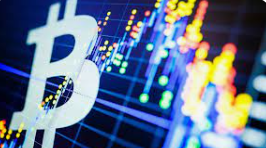

El dataset global de criptomonedas es un conjunto de datos completo  que ofrece una gran cantidad de información sobre más de 7500 criptomonedas, cada una de ellas combinada con el dólar estadounidense (USD). Este conjunto de datos es un recurso invaluable para cualquier persona interesada en explorar el mundo de las monedas digitales y analizar su comportamiento en el mercado. Estos no solo incluyen monedas populares como BTC, ETH y SOL, sino que también capturan monedas recién lanzadas.

**Estructura del Dataset**

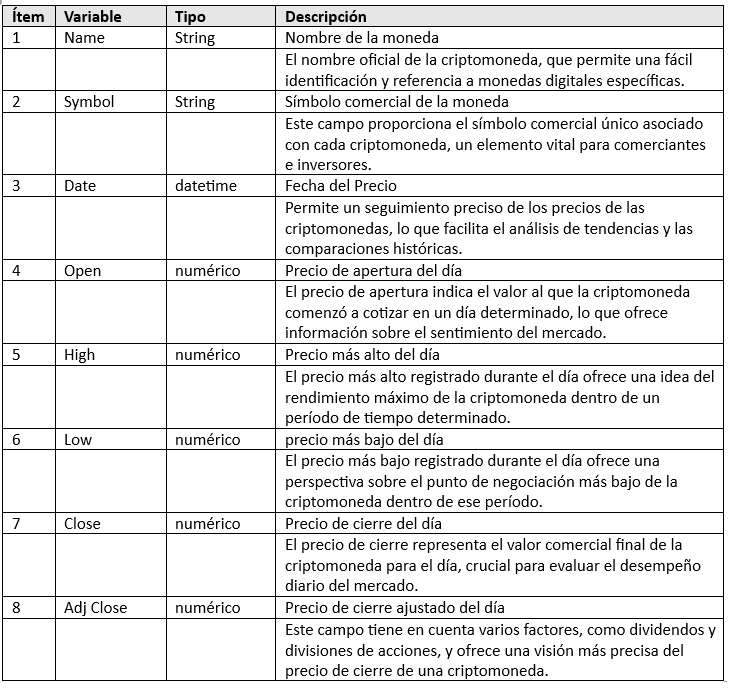

**SE SOLICITA:**

**a)**Cargar los datos

**b)** Realizar tareas de preprocesamiento sobre los datos

**c)**Crear un dataset limpio

**d)** Realizar un analisis EDA (considere las visualizaciones que crea necesarias).

In [3]:
import pandas as pd
df_metadata = pd.read_csv("metadata.csv")

df_metadata.shape

(11303, 3)

In [4]:
df_metadata.head(10)

,Coin Pair Name,Coin Pair Symbol,File Path
0,Bitcoin USD,BTC-USD,BTC-USD.csv
1,Ethereum USD,ETH-USD,ETH-USD.csv
2,Tether USDt USD,USDT-USD,USDT-USD.csv
3,BNB USD,BNB-USD,BNB-USD.csv
4,USD Coin USD,USDC-USD,USDC-USD.csv
5,XRP USD,XRP-USD,XRP-USD.csv
6,Lido Staked ETH USD,STETH-USD,STETH-USD.csv
7,Cardano USD,ADA-USD,ADA-USD.csv
8,Dogecoin USD,DOGE-USD,DOGE-USD.csv
9,Wrapped TRON USD,WTRX-USD,WTRX-USD.csv


In [5]:
df_metadata.tail()

,Coin Pair Name,Coin Pair Symbol,File Path
11298,SPECIEX USD,SPEX23524-USD,SPEX23524-USD.csv
11299,Chat AI USD,AI23955-USD,AI23955-USD.csv
11300,Wrapped Core USD,WCORE-USD,WCORE-USD.csv
11301,Kyber Network Crystal Legacy USD,KNCL-USD,KNCL-USD.csv
11302,ATBCoin USD,ATB-USD,ATB-USD.csv


In [10]:
df_metadata.isna().sum()

Coin Pair Name      0
Coin Pair Symbol    0
File Path           0
dtype: int64

In [7]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Coin Pair Name    11303 non-null  object
 1   Coin Pair Symbol  11303 non-null  object
 2   File Path         11303 non-null  object
dtypes: object(3)
memory usage: 265.0+ KB


Observaciones: Vemos que el dataset 'metadata.csv' tiene tres variables: Coin Pair Name (nombre en el que se conoce + la palabra USD), Coin Pair Symbol (nombre abreviado), File Path (el mismo nombre que en Coin Pair Symbol + .csv, sería el nombre del archivo de cada criptomoneda)

Veamos ahora con cada una de los archivos de cada criptomoneda, veamos que formatos tiene.

In [12]:
from pathlib import Path

metadata_path = Path("data")

chosen = df_metadata.sample(n=min(5, len(df_metadata)))

datasets = {row["Coin Pair Symbol"]: pd.read_csv(metadata_path / row["File Path"])
            for _, row in chosen.iterrows()}

print(chosen[["Coin Pair Name","Coin Pair Symbol","File Path"]])
print("Cargados:", list(datasets.keys()))

            Coin Pair Name Coin Pair Symbol          File Path
3153            Bancor USD          BNT-USD        BNT-USD.csv
2061           Moniwar USD         MOWA-USD       MOWA-USD.csv
6570   Megaton Finance USD    MEGA23854-USD  MEGA23854-USD.csv
10543  Sentre Protocol USD         SNTR-USD       SNTR-USD.csv
6732   illumiShare SRG USD     SRG22901-USD   SRG22901-USD.csv
Cargados: ['BNT-USD', 'MOWA-USD', 'MEGA23854-USD', 'SNTR-USD', 'SRG22901-USD']


In [16]:
for symbol, df in datasets.items():
  print("="*80)
  print(symbol)
  print("\nhead(10):")
  print(df.head(10).to_string(index=False))

  print("\nisna().sum():")
  print(df.isna().sum().to_string())

  print("\ninfo():")
  print(df.info())

BNT-USD

head(10):
      Name  Symbol       Date    Open    High     Low   Close  Adj Close  Volume
Bancor USD BNT-USD 2017-11-09 1.94770 2.10655 1.92439 2.03255    2.03255 2044140
Bancor USD BNT-USD 2017-11-10 2.05097 2.08568 1.83472 1.86940    1.86940 1861230
Bancor USD BNT-USD 2017-11-11 1.85752 1.95966 1.82601 1.92247    1.92247 2650010
Bancor USD BNT-USD 2017-11-12 1.92533 1.92533 1.77016 1.80763    1.80763 2634170
Bancor USD BNT-USD 2017-11-13 1.80419 2.00548 1.80419 1.95752    1.95752 2738800
Bancor USD BNT-USD 2017-11-14 1.95734 2.03758 1.92990 2.03666    2.03666 2596440
Bancor USD BNT-USD 2017-11-15 2.01705 2.06918 1.96217 2.01631    2.01631 2464150
Bancor USD BNT-USD 2017-11-16 2.02100 2.02336 1.90542 1.98173    1.98173 2081880
Bancor USD BNT-USD 2017-11-17 2.00449 2.01138 1.92865 1.96987    1.96987 1564790
Bancor USD BNT-USD 2017-11-18 1.95525 2.07023 1.91779 2.06536    2.06536 1545720

isna().sum():
Name         0
Symbol       0
Date         0
Open         0
High         0


Observaciones: Podemos ver que cada dataset cumple con un formato. Es el siguiente: Name (object), Symbol (object), Date (object), Open (float64), High (float64), Low (float64), Close (float64), Adj Close (float64), Volume (int64).  
Ningun dataset posee valores NA.

In [18]:
import pandas as pd
from pathlib import Path

# supongo df_metadata ya existe y data dir es "data"
data_dir = Path("data")
chosen = df_metadata.sample(n=min(5, len(df_metadata)))  # o usar todo df_metadata si prefieres

dfs = []
for _, row in chosen.iterrows():
  fp = data_dir / row["File Path"]
  df = pd.read_csv(fp)
  
  # asegurar columnas esperadas (si faltan, lanzará KeyError)
  # renombrar "Adj Close" -> "adj_close"
  if "Adj Close" in df.columns:
    df = df.rename(columns={"Adj Close": "adj_close"})
  else:
    # si ya tiene otro nombre en metadata, intenta normalizar
    df = df.rename(columns={c: c.strip() for c in df.columns})
  
  # convertir Date a datetime y poner como índice
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
  df = df.set_index("Date")
  
  # eliminar la columna Symbol si existe
  if "Symbol" in df.columns:
    df = df.drop(columns=["Symbol"])
  
  dfs.append(df)

# concatenar verticalmente
combined = pd.concat(dfs, axis=0, ignore_index=False)

# si quieres que el índice sea datetime y multi-archivo contenga fechas duplicadas, puedes mantener como está.
# finalmente, renombrar cualquier 'Adj Close' restante a 'adj_close' (por si acaso)
if "Adj Close" in combined.columns:
  combined = combined.rename(columns={"Adj Close": "adj_close"})

# asegurar tipo de adj_close float
if "adj_close" in combined.columns:
  combined["adj_close"] = pd.to_numeric(combined["adj_close"], errors="coerce")

# mostrar resumen
print("Combined shape:", combined.shape)
print(combined.dtypes)
print(combined.head(3))

Combined shape: (4585, 7)
Name          object
Open         float64
High         float64
Low          float64
Close        float64
adj_close    float64
Volume         int64
dtype: object
               Name      Open      High       Low     Close  adj_close  \
Date                                                                     
2018-01-12  Zap USD  0.631525  0.965112  0.624149  0.961299   0.961299   
2018-01-13  Zap USD  0.959523  1.834520  0.864457  1.082470   1.082470   
2018-01-14  Zap USD  1.108800  1.183240  0.768561  0.908040   0.908040   

             Volume  
Date                 
2018-01-12   899137  
2018-01-13  2154040  
2018-01-14   595823  


# Análisis Exploratorio de Datos (EDA)

In [19]:
combined.shape

(4585, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 807 entries, 2021-08-09 to 2023-10-24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       807 non-null    object 
 1   Open       807 non-null    float64
 2   High       807 non-null    float64
 3   Low        807 non-null    float64
 4   Close      807 non-null    float64
 5   adj_close  807 non-null    float64
 6   Volume     807 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 50.4+ KB


In [21]:
combined.isna().sum()

Name         0
Open         0
High         0
Low          0
Close        0
adj_close    0
Volume       0
dtype: int64

In [23]:
combined.describe()

,Open,High,Low,Close,adj_close,Volume
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4.585000e+03
mean,2.551026,2.734878,2.444414,2.546026,2.546026,8.172731e+05
std,10.331527,12.139645,9.921745,10.323201,10.323201,2.953543e+06
min,0.000158,0.000168,0.000145,0.000158,0.000158,0.000000e+00
25%,0.002090,0.002236,0.001948,0.002083,0.002083,7.224000e+03
50%,0.008782,0.009516,0.008020,0.008762,0.008762,4.163400e+04
75%,0.093483,0.102920,0.083719,0.093109,0.093109,1.922770e+05
max,78.973640,381.552673,75.306259,79.031281,79.031281,4.424249e+07


In [27]:
combined.index.min()

Timestamp('2018-01-12 00:00:00')

In [28]:
combined.index.max()

Timestamp('2023-10-24 00:00:00')

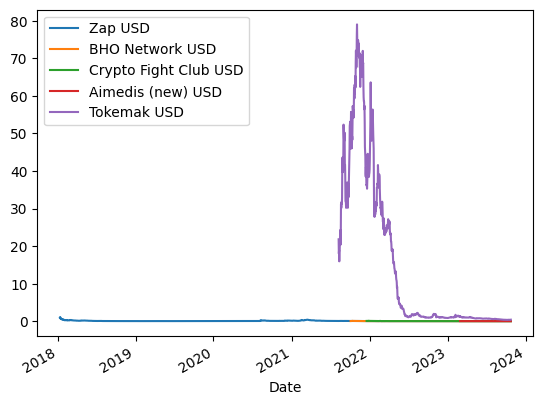

In [ ]:
import matplotlib.pyplot as plt

for name in combined['Name'].unique():
  combined[combined['Name'] == name]['Close'].plot(label=name)

plt.legend()
plt.show()

## Top 5 criptos más negociadas (promedio y total de Volume).

In [ ]:
# Agrupar por criptomoneda y calcular promedio y total de volumen
top5_vol = (
  combined
  .groupby('Name')['Volume']
  .agg(Average_Volume='mean', Total_Volume='sum')
  .sort_values(by='Total_Volume', ascending=False)
  .head(5)
)

top5_vol.style.format({
  'Average_Volume': '{:,.0f}',
  'Total_Volume': '{:,.0f}'
})

print(top5_vol)

                       Average_Volume  Total_Volume
Name                                               
Tokemak USD              3.374576e+06    2723282974
Zap USD                  2.528328e+05     533982891
BHO Network USD          5.600375e+05     420588196
Crypto Fight Club USD    8.627612e+04      58322660
Aimedis (new) USD        4.611150e+04      11020649


## Agrupar por criptomoneda y calcular máximos y mínimos de Close

In [34]:
price_stats = (
  combined
  .groupby('Name')['Close']
  .agg(Max_Price='max', Min_Price='min')
  .sort_index()  # Orden alfabético por Name
)

print(price_stats)

                       Max_Price  Min_Price
Name                                       
Aimedis (new) USD       0.023121   0.003913
BHO Network USD         0.080126   0.000158
Crypto Fight Club USD   0.101944   0.000277
Tokemak USD            79.031281   0.331256
Zap USD                 1.082470   0.001391


In [ ]:
max_dates = combined.groupby('Name')['Close'].idxmax()
min_dates = combined.groupby('Name')['Close'].idxmin()

price_stats = (
  combined.groupby('Name')['Close']
  .agg(Max_Price='max', Min_Price='min')
  .assign(Max_Date=max_dates, Min_Date=min_dates)
  .sort_index()
)

print(price_stats)

                       Max_Price  Min_Price   Max_Date   Min_Date
Name                                                             
Aimedis (new) USD       0.023121   0.003913 2023-03-07 2023-10-17
BHO Network USD         0.080126   0.000158 2021-10-12 2022-12-16
Crypto Fight Club USD   0.101944   0.000277 2021-12-26 2023-10-24
Tokemak USD            79.031281   0.331256 2021-11-03 2023-10-08
Zap USD                 1.082470   0.001391 2018-01-13 2023-09-24


## Calcular variación intradía en porcentaje

In [36]:
combined['IntraDay_Variation'] = ((combined['High'] - combined['Low']) / combined['Open']) * 100

# Top 3 días con mayor variación por criptomoneda
top_variations = (
  combined
  .groupby('Name')
  .apply(lambda x: x.nlargest(3, 'IntraDay_Variation')[['IntraDay_Variation', 'High', 'Low', 'Open']])
  .reset_index(level=0)
)

print(top_variations)

                             Name  IntraDay_Variation        High        Low  \
Date                                                                           
2023-08-27      Aimedis (new) USD           57.374834    0.010543   0.006303   
2023-07-21      Aimedis (new) USD           55.444217    0.009240   0.005920   
2023-07-07      Aimedis (new) USD           53.677422    0.010656   0.006912   
2023-04-06        BHO Network USD          271.599995    0.001856   0.000498   
2022-03-11        BHO Network USD          104.335266    0.003500   0.001695   
2021-10-05        BHO Network USD           77.971628    0.039875   0.022400   
2022-11-06  Crypto Fight Club USD          676.644706    0.007076   0.000905   
2022-03-01  Crypto Fight Club USD          170.790216    0.037733   0.011322   
2021-12-26  Crypto Fight Club USD          159.798870    0.141258   0.048776   
2021-11-16            Tokemak USD          441.759076  381.552673  66.338638   
2023-02-07            Tokemak USD       

C:\Users\Chris\AppData\Local\Temp\ipykernel_13756\822948790.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'IntraDay_Variation')[['IntraDay_Variation', 'High', 'Low', 'Open']])


In [ ]:
import pandas as pd

# Asegurar que el índice es datetime (por si acaso)
combined.index = pd.to_datetime(combined.index)

# Resetear el índice para quitarle el nombre 'Date' y pasarlo a columna
combined = combined.reset_index()

# Ahora 'Date' es solo una columna
combined = combined.sort_values(by='Date', ascending=True)

# Restablecer un índice numérico limpio (por si el sort cambió el orden)
combined = combined.reset_index(drop=True)

ValueError: cannot insert Date, already exists

In [40]:
print(combined.head())

               Name      Open      High       Low     Close  adj_close  \
Date                                                                     
2018-01-12  Zap USD  0.631525  0.965112  0.624149  0.961299   0.961299   
2018-01-13  Zap USD  0.959523  1.834520  0.864457  1.082470   1.082470   
2018-01-14  Zap USD  1.108800  1.183240  0.768561  0.908040   0.908040   
2018-01-15  Zap USD  0.903026  1.160560  0.825817  0.911970   0.911970   
2018-01-16  Zap USD  0.913174  0.931317  0.514221  0.578552   0.578552   

             Volume  IntraDay_Variation       Date  
Date                                                
2018-01-12   899137           53.990413 2018-01-12  
2018-01-13  2154040          101.098457 2018-01-13  
2018-01-14   595823           37.398902 2018-01-14  
2018-01-15   608312           37.069036 2018-01-15  
2018-01-16   131642           45.675410 2018-01-16  


In [43]:
combined.head()

,Name,Open,High,Low,Close,adj_close,Volume,IntraDay_Variation,Date
0,Zap USD,0.631525,0.965112,0.624149,0.961299,0.961299,899137,53.990413,2018-01-12
1,Zap USD,0.959523,1.834520,0.864457,1.082470,1.082470,2154040,101.098457,2018-01-13
2,Zap USD,1.108800,1.183240,0.768561,0.908040,0.908040,595823,37.398902,2018-01-14
3,Zap USD,0.903026,1.160560,0.825817,0.911970,0.911970,608312,37.069036,2018-01-15
4,Zap USD,0.913174,0.931317,0.514221,0.578552,0.578552,131642,45.675410,2018-01-16


In [44]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                4585 non-null   object        
 1   Open                4585 non-null   float64       
 2   High                4585 non-null   float64       
 3   Low                 4585 non-null   float64       
 4   Close               4585 non-null   float64       
 5   adj_close           4585 non-null   float64       
 6   Volume              4585 non-null   int64         
 7   IntraDay_Variation  4585 non-null   float64       
 8   Date                4585 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 322.5+ KB


In [42]:
# Restablecer un índice numérico limpio (por si el sort cambió el orden)
combined = combined.reset_index(drop=True)

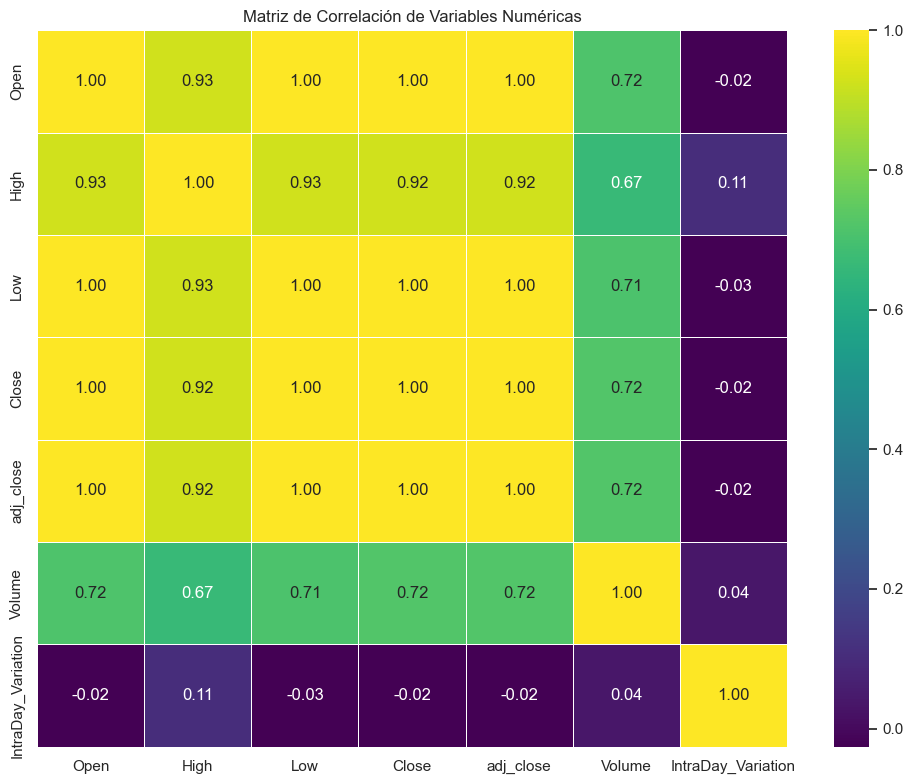

Matriz de correlación:
                        Open      High       Low     Close  adj_close  \
Open                1.000000  0.926869  0.999073  0.997814   0.997814   
High                0.926869  1.000000  0.925605  0.924924   0.924924   
Low                 0.999073  0.925605  1.000000  0.999078   0.999078   
Close               0.997814  0.924924  0.999078  1.000000   1.000000   
adj_close           0.997814  0.924924  0.999078  1.000000   1.000000   
Volume              0.715184  0.666366  0.709924  0.722997   0.722997   
IntraDay_Variation -0.023361  0.105586 -0.025804 -0.024576  -0.024576   

                      Volume  IntraDay_Variation  
Open                0.715184           -0.023361  
High                0.666366            0.105586  
Low                 0.709924           -0.025804  
Close               0.722997           -0.024576  
adj_close           0.722997           -0.024576  
Volume              1.000000            0.037580  
IntraDay_Variation  0.037580       

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Excluir columnas no numéricas
numeric_df = combined.drop(columns=['Name', 'Date'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el directorio de salida si no existe
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'correlation_matrix_heatmap.png')

# Visualizar la matriz de correlación
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.savefig(output_file)
plt.show()

# Mostrar la matriz de correlación en texto
print("Matriz de correlación:")
print(correlation_matrix)
